In [1]:
import pandas as pd
import numpy as np
import os
from datetime import time
import openpyxl
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
from datetime import date, datetime, timedelta
import geopandas as gpd
from shapely.geometry import Point
print(os.getcwd())
print('\033[1m',datetime.now())

/Users/saswatabiswas/tensorflow-test/PythonScripts/GSI_Hackathon
 2025-06-13 11:03:05.141615


In [6]:
df = pd.read_excel("NGCM.xlsx")
df.head(3)

,FID,Shape *,gid,objectid,sampleno,X,Y,Si02_%,Al2O3_%,Fe2O3_%,TiO2_%,CaO_%,MgO_%,MnO_%,Na2O_%,K2O_%,P2O5_%,LOI_%,Ba_ppm,Ga_ppm,Sc_ppm,V_ppm,Th_ppm,Pb_ppm,Ni_ppm,Co_ppm,Rb_ppm,Sr_ppm,Y_ppm,Zr_ppm,Nb_ppm,Cr_ppm,Cu_ppm,Zn_ppm,Au_ppb,Li_ppm,Cs_ppm,As_ppm,Sb_ppm,Bi_ppm,Se_ppm,Ag_ppb,Cd_ppb,Hg_ppb,Be_ppm,Ge_ppm,Mo_ppm,Sn_ppm,La_ppm,Ce_ppm,Pr_ppm,Nd_ppm,Sm_ppm,Eu_ppm,Tb_ppm,Gd_ppm,Dy_ppm,Ho_ppm,Er_ppm,Tm_ppm,Yb_ppm,Lu_ppm,Hf_ppm,Ta_ppm,W_ppm,U_ppm,Pt_ppb,Pd_ppb,In_ppm,F_ppm,Te_ppm,Tl_ppm,toposheet
0,0,Point,129,129,57E02/081/SS/00,77.194444,15.599099,60.03,11.96,4.81,0.81,3.03,1.93,0.13,0.80,1.60,0.08,14.81,450.3,15.4,12.4,88.4,22.8,32.1,59.4,18.7,98.5,264.3,21.6,391.9,18.2,83.5,25.5,48.3,1.5,9.0,5.0,4.98,0.46,0.28,0.10,48,50.0,6.0,1.976,0.927,2.5,2.5,36.221001,92.375999,8.155,31.475000,6.147,1.703,0.894,5.844,4.583,0.950,2.700,0.425,2.830,0.414,13.080,1.074,2.5,4.020,0.0,0.0,0.0,0.0,0.0,0.0,57E02
1,1,Point,130,130,57E02/082/SS/00,77.212963,15.599099,58.85,11.96,4.91,0.79,4.39,2.26,0.15,0.39,0.77,0.08,15.42,435.1,12.3,16.0,104.6,12.0,26.8,69.3,18.3,57.7,258.6,18.6,327.4,15.3,90.7,27.2,49.1,1.5,9.0,5.0,5.43,0.51,0.23,0.13,50,50.0,6.0,1.704,0.893,2.5,2.5,29.961000,76.209999,6.600,26.391001,5.208,1.697,0.787,5.057,4.301,0.922,2.715,0.434,2.800,0.395,9.858,0.912,2.5,2.283,0.0,0.0,0.0,0.0,0.0,0.0,57E02
2,2,Point,131,131,57E02/083/SS/00,77.231481,15.599099,65.12,11.06,4.33,0.70,3.82,1.87,0.13,0.71,1.37,0.07,10.72,450.3,11.3,10.7,92.7,19.6,27.3,54.8,18.1,73.8,290.2,19.4,505.3,15.6,80.3,21.8,40.3,1.5,7.0,5.0,4.46,0.37,0.25,0.12,52,50.0,5.0,1.554,0.895,2.5,2.5,27.212000,73.349998,6.491,25.725000,5.145,1.628,0.754,4.835,4.010,0.853,2.471,0.405,2.697,0.399,16.747,0.954,2.5,3.582,0.0,0.0,0.0,0.0,0.0,0.0,57E02


In [7]:
df.rename(columns={'Shape *':'shape',
                  'Si02_%' : 'SiO2',
                  'Al2O3_%' : 'Al2O3',
                  'Fe2O3_%' : 'Fe2O3',
                  'TiO2_%': 'TiO2', 
                  'CaO_%' : 'CaO', 
                   'MgO_%' : 'MgO',
                   'MnO_%' : 'MnO', 
                   'Na2O_%' : 'Na2O',
                   'K2O_%' : 'K2O',
                   'P2O5_%' : 'P2O5', 
                   'LOI_%' : 'LOI'},inplace =True)

In [10]:
df_cleaned = df.loc[df['SiO2'] != 0]
print('\033[1m')
print("Shape of cleaned data: \n",df_cleaned.shape)
#df_cleaned.reset_index(inplace=True)


Shape of cleaned data: 
 (9995, 73)


### DATA PREPERATION FOR ILR TRANSFORMATION

In [17]:
df2 = df_cleaned[['Ba_ppm', 'Ga_ppm', 'Sc_ppm', 'V_ppm', 'Th_ppm', 'Pb_ppm',
       'Ni_ppm', 'Co_ppm', 'Rb_ppm', 'Sr_ppm', 'Y_ppm', 'Zr_ppm', 'Nb_ppm',
       'Cr_ppm', 'Cu_ppm', 'Zn_ppm', 'Au_ppb', 'Li_ppm', 'Cs_ppm', 'As_ppm',
       'Sb_ppm', 'Bi_ppm', 'Se_ppm', 'Ag_ppb', 'Cd_ppb', 'Hg_ppb', 'Be_ppm',
       'Ge_ppm', 'Mo_ppm', 'Sn_ppm', 'La_ppm', 'Ce_ppm', 'Pr_ppm', 'Nd_ppm',
       'Sm_ppm', 'Eu_ppm', 'Tb_ppm', 'Gd_ppm', 'Dy_ppm', 'Ho_ppm', 'Er_ppm',
       'Tm_ppm', 'Yb_ppm', 'Lu_ppm', 'Hf_ppm', 'Ta_ppm', 'W_ppm', 'U_ppm',
       'Pt_ppb', 'Pd_ppb', 'In_ppm', 'F_ppm', 'Te_ppm', 'Tl_ppm']]

cols = df2.columns
len(cols)
print('\033[1m'+'\033[94m')
print('VARIABLE SELECTED FOR ILR_TRANSFORMATION: \n',cols)


VARIABLE SELECTED FOR ILR_TRANSFORMATION: 
 Index(['Ba_ppm', 'Ga_ppm', 'Sc_ppm', 'V_ppm', 'Th_ppm', 'Pb_ppm', 'Ni_ppm',
       'Co_ppm', 'Rb_ppm', 'Sr_ppm', 'Y_ppm', 'Zr_ppm', 'Nb_ppm', 'Cr_ppm',
       'Cu_ppm', 'Zn_ppm', 'Au_ppb', 'Li_ppm', 'Cs_ppm', 'As_ppm', 'Sb_ppm',
       'Bi_ppm', 'Se_ppm', 'Ag_ppb', 'Cd_ppb', 'Hg_ppb', 'Be_ppm', 'Ge_ppm',
       'Mo_ppm', 'Sn_ppm', 'La_ppm', 'Ce_ppm', 'Pr_ppm', 'Nd_ppm', 'Sm_ppm',
       'Eu_ppm', 'Tb_ppm', 'Gd_ppm', 'Dy_ppm', 'Ho_ppm', 'Er_ppm', 'Tm_ppm',
       'Yb_ppm', 'Lu_ppm', 'Hf_ppm', 'Ta_ppm', 'W_ppm', 'U_ppm', 'Pt_ppb',
       'Pd_ppb', 'In_ppm', 'F_ppm', 'Te_ppm', 'Tl_ppm'],
      dtype='object')


### PARTS PER BILLION to PARTS PER MILLION conversion for columns

In [20]:
df2['Au_ppm'] = np.round(df['Au_ppb']/1000,5)
df2['Ag_ppm'] = np.round(df['Ag_ppb']/1000,5)
df2['Cd_ppm'] = np.round(df['Cd_ppb']/1000,5)
df2['Hg_ppm'] = np.round(df['Hg_ppb']/1000,5)
df2['Pt_ppm'] = np.round(df['Pt_ppb']/1000,5)
df2['Pd_ppm'] = np.round(df['Pd_ppb']/1000,5)

In [26]:
df2 = df2[['Ba_ppm', 'Ga_ppm', 'Sc_ppm', 'V_ppm', 'Th_ppm', 'Pb_ppm',
       'Ni_ppm', 'Co_ppm', 'Rb_ppm', 'Sr_ppm', 'Y_ppm', 'Zr_ppm', 'Nb_ppm',
       'Cr_ppm', 'Cu_ppm', 'Zn_ppm', 'Au_ppm', 'Li_ppm', 'Cs_ppm', 'As_ppm',
       'Sb_ppm', 'Bi_ppm', 'Se_ppm', 'Ag_ppm', 'Cd_ppm', 'Hg_ppm', 'Be_ppm',
       'Ge_ppm', 'Mo_ppm', 'Sn_ppm', 'La_ppm', 'Ce_ppm', 'Pr_ppm', 'Nd_ppm',
       'Sm_ppm', 'Eu_ppm', 'Tb_ppm', 'Gd_ppm', 'Dy_ppm', 'Ho_ppm', 'Er_ppm',
       'Tm_ppm', 'Yb_ppm', 'Lu_ppm', 'Hf_ppm', 'Ta_ppm', 'W_ppm', 'U_ppm']]

### Now import detection limit data

In [27]:
df2_copy = df2.copy()
detection = pd.read_csv('Element_detection.csv')
detection['symbol_1'] = detection['symbol']+'_ppm'
detection.head(3)

symbol = set(list(detection['symbol_1']))
df2_cols = set(list(df2.columns))

In [28]:
detection.head(4)

,symbol,detection,symbol_1
0,SiO2,1000.0,SiO2_ppm
1,Al2O3,1000.0,Al2O3_ppm
2,Fe,1000.0,Fe_ppm
3,Na2O,1000.0,Na2O_ppm


In [29]:
symbol = set(list(detection['symbol_1']))
df2_cols = set(list(df2.columns))
symb = (symbol - df2_cols)
symb = list(df2_cols - symb)
i = 1

for symbols in symb:
    print(str(i)+'.'+symbols)
    detection_val = list(detection.loc[detection['symbol_1']==symbols]['detection'])[0]
    df2.loc[df2[symbols] <= detection_val, symbols] = 0.0001
    print(detection_val)
    i = i+1

1.Cu_ppm
1.0
2.Ag_ppm
0.02
3.Hf_ppm
0.5
4.U_ppm
0.5
5.Co_ppm
1.0
6.Sr_ppm
15.0
7.Cs_ppm
10.0
8.Zn_ppm
10.0
9.Eu_ppm
0.01
10.Rb_ppm
3.0
11.Cr_ppm
15.0
12.Ta_ppm
0.2
13.Er_ppm
0.02
14.Ce_ppm
8.0
15.Tb_ppm
0.03
16.Gd_ppm
0.03
17.Mo_ppm
0.5
18.Ge_ppm
0.05
19.Yb_ppm
0.0
20.W_ppm
0.5
21.Ho_ppm
0.01
22.Au_ppm
0.0
23.Zr_ppm
10.0
24.Sm_ppm
0.05
25.Sb_ppm
0.2
26.Tm_ppm
0.01
27.As_ppm
1.0
28.Se_ppm
5.0
29.Sn_ppm
1.0
30.Bi_ppm
0.1
31.Hg_ppm
0.01
32.La_ppm
1.0
33.Ga_ppm
1.0
34.Be_ppm
0.3
35.Pr_ppm
0.08
36.Ni_ppm
2.0
37.Li_ppm
5.0
38.Sc_ppm
3.5
39.Ba_ppm
50.0
40.Nb_ppm
5.0
41.Nd_ppm
0.06
42.Y_ppm
5.0
43.Th_ppm
4.0
44.Cd_ppm
0.1
45.V_ppm
20.0
46.Lu_ppm
0.0
47.Dy_ppm
0.01
48.Pb_ppm
2.0


### CREATE SBP_BASIS FROM THE SBP BALANCED DATA

In [66]:
from skbio.stats.composition import sbp_basis,ilr,ilr_inv
df_t = pd.read_csv('SBP_base_for_aitchison_simplex_geometry.csv')
sbp_ward_balanced_array = np.array(df_t)
sbp_ward_basis = sbp_basis(sbp_ward_balanced_array)
print("\033[1m"+"\033[94m"+"Chek for Row_Sum = 0 : \n", np.round(np.sum(sbp_ward_basis, axis=1),2))

Chek for Row_Sum = 0 : 
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0. -0. -0.
  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0.]


In [69]:
print(final_var_list)
df_4 = df2[final_var_list]

ilr_data = ilr(df_4,sbp_ward_basis, check=True)
ilr_data = pd.DataFrame(ilr_data)
ilr_data_1 = ilr_data.copy()

col_index = ilr_data.shape[1]
for i in range(0,col_index):
    ilr_data.rename(columns={i:final_var_list[i]},inplace=True)

['Y_ppm', 'Sn_ppm', 'Nb_ppm', 'Se_ppm', 'Ag_ppm', 'Hf_ppm', 'Bi_ppm', 'Ta_ppm', 'Zn_ppm', 'Mo_ppm', 'Sr_ppm', 'Sb_ppm', 'Ce_ppm', 'Nd_ppm', 'Sc_ppm', 'W_ppm', 'V_ppm', 'Cr_ppm', 'Li_ppm', 'Hg_ppm', 'Th_ppm', 'Rb_ppm', 'Ge_ppm', 'Co_ppm', 'La_ppm', 'Gd_ppm', 'Ni_ppm', 'Be_ppm', 'Cu_ppm', 'Pb_ppm', 'Sm_ppm', 'Dy_ppm', 'Er_ppm', 'Tm_ppm', 'Lu_ppm', 'Yb_ppm', 'Cd_ppm', 'Tb_ppm', 'Pr_ppm', 'Ho_ppm', 'U_ppm', 'Cs_ppm', 'Eu_ppm', 'Ba_ppm', 'Au_ppm', 'Ga_ppm', 'Zr_ppm', 'As_ppm']


#### Calculation of ILR MEAN 

In [72]:
ilr_array = np.array(ilr_data)
ilr_mean = np.mean(ilr_array, axis=0)
ilr_mean

array([ 2.09556533,  7.31461595, -7.02166597, -4.68071485,  4.80897723,
        8.29459746,  0.60712664,  4.0762795 , -0.10805575,  4.22069471,
       -1.73346703, -0.50573548, -1.50401906,  1.29760115, -0.09924377,
       -0.01264673, -0.42827718,  5.20101302,  3.21543425,  3.78169303,
        0.36383713, -0.04241102, -0.14142918, -6.2614103 , -1.40783251,
        0.5419504 , -3.70147631,  3.46859432,  2.11767453, -8.57156596,
        1.57578795,  6.98794708,  3.44734779, -4.14948278, -8.30623833,
        4.43888239,  3.57034074,  5.08638485,  7.22748561,  2.81300432,
       -3.1061929 ,  3.11695829,  3.29167592, -1.60792694, -7.80854885,
       -3.1982328 ,  3.26617498])

#  PCA

In [177]:
def _pca_(data, var_list):
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    import seaborn as sns
    import warnings
    warnings.filterwarnings('ignore')
    var_ratio = []
    x = data
    x = StandardScaler().fit_transform(x)
    pca = PCA(random_state=42)
    pc_scores = pca.fit_transform(x)
    
    '''
    Returns Var Ratio
    '''
    explained_var_ratio = np.round(pca.explained_variance_ratio_,2)   
    for i in range(0, x.shape[1]):
        if i == 0:
            var_r = np.round(explained_var_ratio[i],2)
            var_ratio.append(var_r)
        else:
            var_r = explained_var_ratio[i]+var_ratio[i-1]
            var_r = np.round(var_r,2)
            var_ratio.append(var_r)
     
    '''
    Returns PC Scores
    '''
    #pc_scores = pd.DataFrame(pca.components_)   
    pc_scores = pd.DataFrame(pc_scores)
    for i in range(1,x.shape[1]+1):
        pc_name = 'PC_'+str(i)
        pc_scores.rename(columns={i-1 : pc_name},inplace=True)
        
    print(pc_scores)

    '''
    Plots Variance Explained
    '''  
    sns.set_style('whitegrid')
    
    plt.figure(figsize=(20,4))
    fig, ax = plt.subplots(figsize=(10,4))
    ax.set_facecolor('xkcd:white')
    ax.plot(range(0,len(var_ratio)),var_ratio,marker='*', color = 'royalblue')
    plt.xlabel('n_components', fontsize = 25, fontweight = 'bold', color = 'blue')
    plt.ylabel('Explained variance ratio', fontsize = 20, fontweight = 'bold', color = 'red')
    plt.xlim([-1,50])
    plt.ylim([-0.01,1.1])
    plt.title('n_components vs. Explained Variance Ratio:', fontsize = 20, weight = 'bold',color = 'red')
    
    '''
    Returns Factor Loadings
    '''
    fc_loading = pca.components_.T * np.sqrt(pca.explained_variance_)
    index_list = var_list[0:len(var_list)-1]
    df_loading = pd.DataFrame(fc_loading, index=index_list)
    for i in range(1,x.shape[1]+1):
        pc_name = 'PC_'+str(i)
        df_loading.rename(columns={i-1 : pc_name},inplace=True)
    
            
    return var_ratio, pc_scores,df_loading

          PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0     3.975227 -1.276627  1.578923  0.348761  0.307870 -0.048060  0.332336   
1     4.120393 -1.237250  1.582036  0.649996  0.477104 -0.142577  0.185345   
2     4.182538 -1.252622  1.547392  0.158484  0.723214 -0.222276  0.055507   
3     4.507536 -1.492625  1.860424  0.003561  1.477905 -0.461425  0.173536   
4     3.905990 -1.108152  1.550841  0.891244  0.005441 -0.450792  0.090485   
...        ...       ...       ...       ...       ...       ...       ...   
9990 -2.391440  0.963115 -2.538475 -0.563700  0.187278 -0.572144 -0.179380   
9991 -2.255655  0.617848 -2.552191 -0.454028  0.389579 -0.333497  0.041412   
9992 -2.464015  0.620813 -2.588118 -0.271571 -0.191465 -0.543584  0.648207   
9993 -2.232333  0.807339 -2.528616 -0.428415  0.316395 -0.682869  0.172820   
9994 -2.296164  0.944137 -2.475655 -0.557960 -0.248273 -0.874642  0.749492   

          PC_8      PC_9     PC_10     PC_11     PC_12     PC_1

<Figure size 1440x288 with 0 Axes>

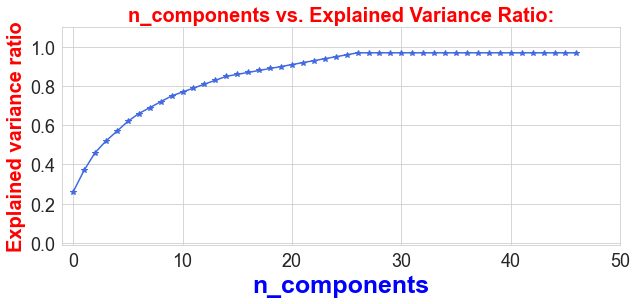

In [178]:
pca_single = _pca_(ilr_data,final_var_list)

In [101]:
print("Var Ratio:",pca_single[0])
pc_score = pca_single[1]
df_loading = pca_single[2]
df_loading.head(5)

Var Ratio: [0.26, 0.37, 0.46, 0.52, 0.57, 0.62, 0.66, 0.69, 0.72, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97]


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47
Y_ppm,-0.110792,0.009498,0.000013,-0.083860,0.201014,0.503257,-0.184829,0.327141,-0.043152,-0.050612,0.478162,0.271677,-0.216837,-0.059953,0.208428,-0.078049,-0.109055,0.026707,0.173421,0.139076,0.130661,0.026535,-0.004982,0.031672,0.188873,0.066142,-0.084327,0.068209,-0.004843,-0.051600,-0.027402,-0.005869,-0.002144,-0.027595,0.029453,0.026350,0.008877,0.015546,0.001738,0.006769,0.002859,0.000018,0.003069,0.001008,0.000791,0.000432,0.000158
Sn_ppm,0.285142,-0.086851,0.194156,-0.297708,-0.453386,-0.377997,0.232804,-0.263725,0.017874,-0.119409,0.185317,0.041989,-0.054185,0.134111,-0.099831,-0.049597,0.322468,-0.002002,0.263438,0.057907,0.075912,0.051517,0.010064,-0.023681,-0.019544,0.050176,0.014222,0.050732,-0.033250,0.062252,-0.039225,0.012381,0.058839,-0.150652,0.006344,0.043982,0.001770,0.037095,-0.005347,0.002038,-0.030580,0.000425,0.005456,-0.004746,-0.000470,0.001179,0.000062
Nb_ppm,0.616083,0.137125,0.412306,-0.005156,0.487576,-0.201592,0.197605,0.070214,-0.130588,-0.139972,0.055727,0.005767,-0.040795,-0.061574,-0.015643,0.017011,0.019319,0.034522,-0.045662,-0.021165,0.012167,0.009293,0.030252,0.036642,-0.002109,0.107126,0.051519,0.018343,0.066188,-0.012930,0.084276,-0.049068,0.016563,0.012352,-0.029104,0.016435,-0.023739,-0.005899,-0.024180,-0.014562,-0.020532,-0.111935,0.091534,-0.063127,-0.011896,-0.008722,0.001932
Se_ppm,0.694248,-0.082170,0.325837,0.190527,-0.087356,0.248355,-0.087491,-0.235235,-0.277279,0.026316,0.001685,-0.176111,-0.080087,-0.002240,0.007214,0.081993,-0.048349,-0.005579,0.103868,-0.052291,-0.030481,-0.079422,-0.029881,-0.053044,0.016375,-0.113541,-0.022090,0.058227,-0.049839,-0.025293,-0.121484,-0.053326,-0.001624,0.052218,-0.120382,0.149057,-0.063689,-0.031884,-0.072474,0.012518,0.002612,0.011022,0.010136,-0.004495,0.004453,0.004248,-0.000517
Ag_ppm,-0.720586,0.176106,-0.281059,0.089771,0.208139,0.033844,0.045058,0.012139,-0.253732,-0.061160,0.194904,0.113738,-0.044310,0.006761,0.080815,-0.038661,-0.065984,-0.020380,0.188871,-0.040816,-0.023865,0.010718,0.101640,-0.116424,-0.252776,0.013859,0.084576,-0.126847,-0.110752,-0.027836,0.009894,0.019250,0.012095,0.064716,-0.009951,0.011342,-0.010533,-0.005858,0.035894,-0.002664,-0.115757,0.005793,-0.004603,0.001129,-0.008322,0.004491,0.000347


In [100]:
pc_score.head(5)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47
0,3.975227,-1.276627,1.578923,0.348761,0.307870,-0.048060,0.332336,0.075385,-1.448752,-0.822794,-0.215596,-0.025144,-0.059499,-0.372298,0.223805,-0.144798,0.138806,-0.502088,-0.194808,0.139765,0.371122,-0.079798,0.057694,-0.222027,-0.176733,-0.419797,0.007383,0.191368,0.155959,-0.023797,0.193363,0.041670,0.287012,0.000239,-0.080633,0.116516,-0.167477,0.014972,0.123464,0.136361,0.012103,0.039596,0.037081,-0.066836,0.041950,-0.147740,-0.023479
1,4.120393,-1.237250,1.582036,0.649996,0.477104,-0.142577,0.185345,-0.146846,-1.213244,-0.609153,-0.109227,0.226237,0.091475,-0.434764,-0.001613,-0.293786,0.225031,-0.354773,-0.214845,-0.011398,0.490466,-0.414017,0.247894,-0.244994,-0.166014,-0.292015,0.116309,0.231813,0.173959,-0.231235,0.233043,-0.069341,0.263151,0.058194,-0.047037,0.232361,-0.156291,0.118034,0.257612,0.158004,0.061618,0.033812,0.018337,-0.128433,0.028978,-0.099970,-0.040097
2,4.182538,-1.252622,1.547392,0.158484,0.723214,-0.222276,0.055507,-0.378576,-1.266799,-0.528628,-0.254344,0.181498,0.013728,-0.394854,0.122120,-0.223522,0.088124,-0.466124,-0.278295,0.151207,0.506810,-0.066601,0.040232,-0.332112,-0.208675,-0.297940,-0.066810,0.203468,0.065028,-0.246710,0.123493,0.045572,0.225779,0.007691,-0.123164,0.202122,-0.075922,0.077216,0.223090,0.241817,0.072538,0.087818,-0.099625,-0.050698,0.038942,-0.107007,-0.025862
3,4.507536,-1.492625,1.860424,0.003561,1.477905,-0.461425,0.173536,-0.552636,-1.292970,-0.594268,-0.241259,0.236423,0.045560,-0.330596,0.059023,-0.234905,0.061838,-0.504750,-0.200812,0.142535,0.547670,0.073971,-0.064076,-0.516139,-0.279518,-0.209506,-0.267025,0.156203,0.218994,-0.375257,0.084218,0.048018,0.241102,0.044758,-0.166412,0.217285,-0.056717,0.070301,0.241535,0.208350,0.082064,0.087018,-0.134862,-0.004339,0.045194,-0.094027,-0.013487
4,3.905990,-1.108152,1.550841,0.891244,0.005441,-0.450792,0.090485,0.335148,-1.363370,-0.622976,-0.129330,0.034182,-0.059933,-0.274242,0.256968,-0.046379,0.200482,-0.261873,-0.156005,0.113452,0.328703,-0.512123,0.287704,-0.273171,0.015740,-0.418451,0.102952,0.193036,-0.006480,-0.028045,0.190822,-0.091935,0.272249,0.176877,-0.006214,0.176096,-0.119982,0.161863,0.193241,0.282932,0.071331,0.031870,0.006565,-0.159015,0.021319,-0.058379,-0.057486


### Now Transforming pca output from orthonormal space to Compositional Space

In [103]:
pca_score_ilr_inv = ilr_inv((pc_score @ df_loading.T)+ilr_mean, sbp_ward_basis)
pca_score_ilr_inv = pd.DataFrame(pca_score_ilr_inv)
for i in range(0,pca_score_ilr_inv.shape[1]):
    pc_name = 'PC_'+str(i+1)
    pca_score_ilr_inv.rename(columns={i:pc_name}, inplace = True)

In [104]:
original_loading_space = pd.DataFrame(data=(sbp_ward_basis).T @ df_loading.values,
                                     index=final_var_list)
for i in range(0,original_loading_space.shape[1]):
    pc_name = 'PC_'+str(i+1)
    original_loading_space.rename(columns={i:pc_name}, inplace=True)

In [105]:
original_loading_space = np.round(original_loading_space,2)
original_loading_space

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47
Y_ppm,0.92,0.20,-1.10,0.04,0.20,0.24,-0.05,0.11,-0.11,-0.16,0.43,0.19,-0.14,-0.05,0.19,-0.06,-0.09,0.04,0.12,0.09,0.07,0.03,-0.04,0.04,0.17,0.03,-0.07,0.06,0.01,-0.00,-0.04,-0.03,0.02,0.00,0.03,0.00,0.01,0.03,0.01,0.01,0.00,0.01,0.02,-0.01,0.00,0.00,-0.00
Sn_ppm,1.08,0.18,-1.10,0.16,-0.09,-0.47,0.21,-0.35,-0.05,-0.08,-0.25,-0.20,0.16,0.04,-0.11,0.05,0.06,0.00,-0.13,-0.11,-0.11,-0.00,-0.04,-0.00,-0.10,-0.06,0.04,-0.04,0.01,0.07,-0.01,-0.02,0.02,0.04,-0.02,-0.03,-0.00,0.01,0.00,0.00,-0.00,0.01,0.02,-0.01,0.00,0.00,-0.00
Nb_ppm,0.10,-0.07,0.41,-0.51,-0.72,-0.49,0.39,-0.42,0.03,-0.19,0.45,0.20,-0.03,0.09,0.01,-0.03,0.12,0.00,0.09,-0.04,0.01,-0.00,0.00,-0.03,0.00,0.03,-0.02,0.02,-0.01,0.00,-0.02,0.02,0.01,-0.04,-0.01,0.01,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00
Se_ppm,-0.30,0.05,0.13,-0.09,-0.08,0.05,0.06,-0.05,0.01,-0.02,0.19,0.14,0.05,-0.10,0.15,0.04,-0.34,0.01,-0.28,-0.12,-0.10,-0.08,-0.01,0.01,0.03,-0.04,-0.04,-0.05,0.04,-0.09,0.04,0.00,-0.08,0.18,-0.02,-0.05,-0.00,-0.05,0.01,0.00,0.04,-0.00,-0.01,0.01,0.00,0.00,-0.00
Ag_ppm,0.83,-0.24,0.63,-0.20,1.09,-0.41,0.32,0.04,-0.10,-0.24,0.05,-0.04,-0.03,-0.06,-0.01,-0.02,0.01,0.01,-0.04,0.01,0.03,0.00,0.00,-0.03,0.01,0.03,0.03,0.01,0.04,-0.01,0.03,-0.01,0.02,0.01,-0.01,0.02,-0.01,0.01,-0.01,0.00,-0.01,-0.05,0.04,-0.01,-0.01,-0.00,-0.00
Hf_ppm,-0.04,-0.44,0.05,-0.20,0.40,-0.12,0.04,-0.06,0.09,-0.04,-0.03,-0.05,0.03,0.03,0.02,-0.04,-0.02,-0.04,0.02,0.04,0.01,-0.01,-0.04,-0.08,0.02,-0.12,-0.05,-0.01,-0.06,0.01,-0.09,0.06,-0.01,-0.01,0.03,-0.01,0.02,0.01,0.02,0.02,0.02,0.11,-0.09,0.08,0.01,0.01,-0.00
Bi_ppm,0.94,-0.08,0.58,0.28,-0.13,0.50,-0.20,-0.53,-0.52,-0.04,0.00,-0.34,-0.19,0.02,0.03,0.08,-0.09,-0.00,0.09,-0.05,-0.02,-0.06,-0.03,-0.06,0.02,-0.05,0.02,0.04,-0.04,-0.02,-0.04,-0.03,0.01,0.01,-0.02,0.03,-0.01,-0.01,-0.02,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
Ta_ppm,-0.04,0.03,0.11,0.01,-0.01,0.14,-0.08,-0.19,-0.13,-0.08,-0.00,-0.09,-0.08,0.03,0.02,-0.03,-0.02,0.00,-0.06,0.02,0.03,0.05,0.01,0.02,-0.01,0.11,0.05,-0.04,0.03,0.02,0.13,0.04,0.01,-0.06,0.15,-0.18,0.08,0.04,0.08,-0.02,0.00,-0.01,-0.01,0.01,-0.01,-0.01,0.00
Zn_ppm,0.20,0.05,-0.16,0.07,0.07,0.15,-0.11,0.20,0.01,-0.06,0.24,0.17,-0.17,-0.00,0.06,0.06,0.00,0.13,0.07,0.02,-0.02,0.04,0.13,-0.22,-0.36,-0.02,0.13,-0.11,-0.07,0.01,0.00,0.02,-0.01,0.03,-0.00,0.01,0.00,-0.00,-0.00,-0.00,-0.03,0.00,-0.00,-0.00,-0.00,0.00,0.00
Mo_ppm,1.21,-0.20,0.23,-0.06,-0.22,0.10,-0.18,0.19,0.37,0.03,-0.03,0.01,-0.11,-0.01,-0.05,0.12,0.10,0.16,-0.20,0.08,0.01,0.03,-0.01,-0.05,-0.00,-0.04,0.01,0.07,0.09,0.05,-0.01,-0.01,-0.02,-0.06,0.01,-0.01,0.02,0.01,-0.05,-0.00,0.14,-0.01,0.00,-0.00,0.01,-0.00,-0.00


In [181]:
df_4 = pd.concat([df_cleaned[['FID','shape','gid','sampleno','X','Y']],
                 pca_score_ilr_inv], axis=1)
df_4.head(3)

,FID,shape,gid,sampleno,X,Y,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48
0,0.0,Point,129.0,57E02/081/SS/00,77.194444,15.599099,0.087196,0.008520,0.014364,6.518961e-08,0.000229,0.035823,0.000472,0.001721,0.056683,0.004617,0.191964,0.000134,0.017488,0.005444,0.007607,0.001841,0.037864,0.035959,0.004719,2.687096e-07,0.010360,0.039623,0.001211,0.009039,0.008554,0.001568,0.045601,0.001057,0.015036,0.016245,0.002129,0.001524,0.001215,0.000135,0.000072,0.001009,3.769894e-08,0.000314,0.001232,0.000670,0.001282,4.345668e-08,0.000393,0.087817,0.000007,0.003447,0.236266,0.001546
1,1.0,Point,130.0,57E02/082/SS/00,77.212963,15.599099,0.095611,0.010348,0.012783,6.202091e-08,0.000266,0.033998,0.000488,0.001620,0.059308,0.005367,0.194136,0.000163,0.013918,0.004838,0.008221,0.002106,0.044767,0.039100,0.004923,2.696076e-07,0.006311,0.033865,0.001278,0.008538,0.006940,0.001562,0.053112,0.001018,0.015203,0.016180,0.001981,0.000994,0.001608,0.000160,0.000069,0.001190,4.282587e-08,0.000296,0.001051,0.000610,0.000972,4.431157e-08,0.000372,0.085337,0.000008,0.002899,0.224798,0.001688
2,2.0,Point,131.0,57E02/083/SS/00,77.231481,15.599099,0.097559,0.010803,0.012767,5.882894e-08,0.000358,0.043380,0.000481,0.001612,0.052440,0.005195,0.193844,0.000122,0.011559,0.004221,0.006876,0.002029,0.042677,0.034906,0.004885,2.506470e-07,0.009641,0.035508,0.001182,0.008665,0.006453,0.001414,0.037464,0.000965,0.011198,0.014661,0.001823,0.000728,0.001140,0.000152,0.000088,0.001449,4.077800e-08,0.000264,0.000957,0.000476,0.001139,4.066814e-08,0.000335,0.085152,0.000008,0.002549,0.249306,0.001570


In [423]:
df_loading1 = original_loading_space.sort_values(by=['PC_1'], ascending=False)
df_loading2 = original_loading_space.sort_values(by=['PC_2'], ascending=False)
df_loading3 = original_loading_space.sort_values(by=['PC_3'], ascending=False)
df_loading4 = original_loading_space.sort_values(by=['PC_4'], ascending=False)
df_loading5 = original_loading_space.sort_values(by=['PC_5'], ascending=False)
df_loading6 = original_loading_space.sort_values(by=['PC_6'], ascending=False)


print('\033[1m'+'\033[94m')
print(df_loading1[['PC_1']].head(10))
print('=================')
print('\033[92m')
print(df_loading2[['PC_2']].head(10))
print('=================')
print('\033[91m')
print(df_loading3[['PC_3']].head(10))
print('=================')
print('\033[95m')
print(df_loading4[['PC_4']].head(10))
print('=================')
print('\033[96m')
print(df_loading5[['PC_5']].head(10))
print('=================')


        PC_1
Mo_ppm  1.21
Sn_ppm  1.08
W_ppm   0.99
Li_ppm  0.96
Bi_ppm  0.94
Y_ppm   0.92
Ag_ppm  0.83
As_ppm  0.79
Sb_ppm  0.67
Au_ppm  0.60

        PC_2
Tm_ppm  1.20
Pr_ppm  0.54
Gd_ppm  0.31
Dy_ppm  0.29
Ge_ppm  0.26
Y_ppm   0.20
Be_ppm  0.19
Tb_ppm  0.19
Sn_ppm  0.18
Lu_ppm  0.17

        PC_3
Ag_ppm  0.63
Bi_ppm  0.58
Nb_ppm  0.41
Sb_ppm  0.37
Ga_ppm  0.31
Mo_ppm  0.23
W_ppm   0.22
Tm_ppm  0.22
Au_ppm  0.18
Eu_ppm  0.17

        PC_4
Sb_ppm  0.48
Ni_ppm  0.29
Bi_ppm  0.28
Cu_ppm  0.23
Dy_ppm  0.23
Cr_ppm  0.20
Sc_ppm  0.20
Er_ppm  0.20
Ho_ppm  0.19
Pb_ppm  0.18

        PC_5
Ag_ppm  1.09
Hf_ppm  0.40
Lu_ppm  0.22
Y_ppm   0.20
Yb_ppm  0.16
Pb_ppm  0.11
Cd_ppm  0.11
Rb_ppm  0.10
Cr_ppm  0.09
Cu_ppm  0.08


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


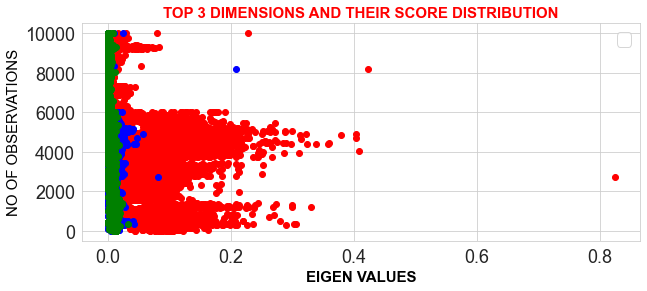

In [199]:
x_arr = np.arange(0,10004,1)

import seaborn as sns
sns.set_style('whitegrid')
fig = plt.figure(figsize=(10,4))
plt.scatter(df_4['PC_1'],x_arr ,color = 'red')
plt.scatter(df_4['PC_2'],x_arr,color = 'blue')
plt.scatter(df_4['PC_3'],x_arr, color = 'green')
#plt.scatter(df_4['PC_4'],x_arr,color = 'yellow')
plt.legend(loc ='best')
plt.tick_params(axis='both', which='minor', labelsize=2)
plt.xlabel("EIGEN VALUES", color = 'black', fontweight = 'bold', fontsize = 15)
plt.ylabel('NO OF OBSERVATIONS', color = 'black', fontsize = 15)
plt.title('TOP 3 DIMENSIONS AND THEIR SCORE DISTRIBUTION', size = 15, fontweight = 'bold', color = 'red')
plt.show()

In [335]:
df_4.rename(columns={'X':'Longitude',
                    'Y' : 'Latitude'},
           inplace=True)

### CLUSTERING FOR PC 1

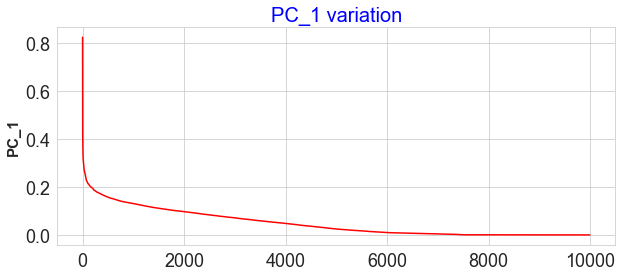

In [336]:
df_4.sort_values(by=['PC_1'], ascending=False, inplace=True)
df_4.reset_index(drop=True, inplace=True)
plt.figure(figsize=(10,4))
plt.plot(df_4['PC_1'], color='red')
plt.ylabel("PC_1", fontsize = 15, fontweight = 'bold')
plt.title("PC_1 variation", fontsize = 20, color = 'blue')
plt.show()

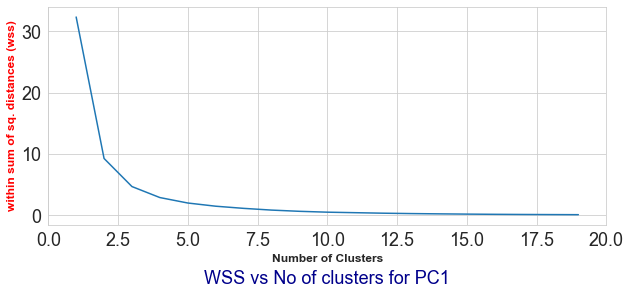

In [337]:
from sklearn.cluster import KMeans
df_clus_data = df_4.loc[df_4['PC_1'].isna()==False]
df_clus_data['PC_1'] = np.round(df_clus_data['PC_1'],3)

wss = []
for i in range(1,20,1):
    kmeans = KMeans(i)
    kmeans.fit(df_clus_data[['PC_1']])
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

number_of_clusters = range(1,20,1)
fig = plt.figure(figsize = (10,4))
plt.plot(number_of_clusters,wss)
#plt.xticks(np.arange(min(number_of_clusters),max(number_of_clusters)+1),1)
plt.title("WSS vs No of clusters for PC1", fontsize = 18, color = 'DarkBlue', y = -0.3)
plt.xlabel("Number of Clusters", fontsize = 12, fontweight = "bold")
plt.ylabel("within sum of sq. distances (wss)",fontsize = 12, fontweight = "bold",color = 'red')
plt.xlim(0,20,1)
plt.show()

In [338]:
df_clus_data.sort_values(by=['PC_1'], ascending=False, inplace=True)
kmeans = KMeans(n_clusters=10, init="random", max_iter=1000, random_state=78)
y_kmc = kmeans.fit_predict(df_clus_data[['PC_1']])

#Now adding the cluster_labels to the original data set
clustered_data_pc1 = df_clus_data[['sampleno','Longitude','Latitude','PC_1']]
cluster_label = pd.DataFrame({'cluster':y_kmc})
clustered_data_pc1= pd.concat([clustered_data_pc1,cluster_label],axis=1)
clustered_data_pc1.cluster.value_counts()

cluster
4    4200
2    1178
6    1102
1    1069
5    1024
3     726
7     449
0     198
9      48
8       1
Name: count, dtype: int64

In [339]:
cluster_grouped = clustered_data_pc1.groupby(['cluster']).agg({
    'PC_1':['mean','max','min']
})
cluster_grouped.columns = ['_'.join(col).strip() for col in cluster_grouped.columns.values]
cluster_grouped = cluster_grouped.reset_index()
cluster_grouped.sort_values(by=['PC_1_min'], ascending=False)

,cluster,PC_1_mean,PC_1_max,PC_1_min
8,8,0.824000,0.824,0.824
9,9,0.299375,0.422,0.256
0,0,0.207581,0.253,0.185
7,7,0.161263,0.184,0.145
3,3,0.128090,0.144,0.114
5,5,0.098880,0.113,0.085
1,1,0.071408,0.084,0.059
6,6,0.046105,0.058,0.034
2,2,0.021851,0.033,0.013
4,4,0.002564,0.012,0.000


In [340]:
clustered_data_pc1.loc[clustered_data_pc1['cluster']==8,'weight'] = 40
clustered_data_pc1.loc[clustered_data_pc1['cluster'] == 9,'weight'] = 32
clustered_data_pc1.loc[clustered_data_pc1['cluster'] == 0,'weight'] = 20
clustered_data_pc1.loc[clustered_data_pc1['cluster'] == 7, 'weight'] = 14
clustered_data_pc1.loc[clustered_data_pc1['cluster'] == 3, 'weight'] = 12
clustered_data_pc1.loc[clustered_data_pc1['cluster'] == 5, 'weight'] = 10
clustered_data_pc1.loc[clustered_data_pc1['cluster'] == 1, 'weight'] = 8
clustered_data_pc1.loc[clustered_data_pc1['cluster'] == 6, 'weight'] = 6
clustered_data_pc1.loc[clustered_data_pc1['cluster'] == 2, 'weight'] = 4
clustered_data_pc1.loc[clustered_data_pc1['cluster'] == 4, 'weight'] = 2
clustered_data_pc1['weight'].value_counts()
clustered_data_pc1.to_csv('pc_1_weight_',index=False)
clustered_data_pc1.head(3)

,sampleno,Longitude,Latitude,PC_1,cluster,weight
0,57F06/174/SS/10/12,77.352421,14.726449,0.824,8,40.0
1,57A16/132/S/14,76.759310,15.171710,0.422,9,32.0
2,57B4/177/S/11,76.155750,14.225167,0.408,9,32.0


In [341]:
heat_data = clustered_data_pc1[['Latitude', 'Longitude','weight']].copy()
heat_data.rename(columns={'Latitude':'lat',
                         'Longitude':'lon',
                         'weight':'intesity'}, inplace = True)
heat_data = np.array(heat_data)

coordinates = [(lat, lon, intensity) for lat, lon, intensity in heat_data]
geometry = [Point(lon, lat, intensity) for lat, lon, intensity in coordinates]
gdf = gpd.GeoDataFrame(
    {'intensity': [intensity for _, _, intensity in coordinates]},
    geometry=geometry
)
gdf.set_crs("EPSG:4326", allow_override=True, inplace=True)
gdf.to_file("heatmap_points_PC1.shp")

### CLUSTERING FOR PC 2

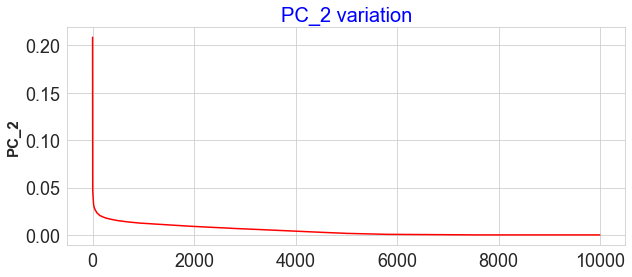

In [343]:
df_4.sort_values(by=['PC_2'], ascending=False, inplace=True)
df_4.reset_index(drop=True, inplace=True)
plt.figure(figsize=(10,4))
plt.plot(df_4['PC_2'], color='red')
plt.ylabel("PC_2", fontsize = 15, fontweight = 'bold')
plt.title("PC_2 variation", fontsize = 20, color = 'blue')
plt.show()

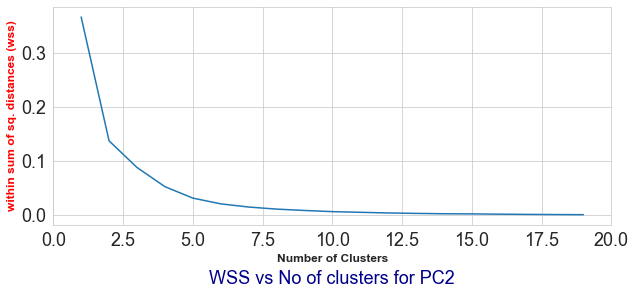

In [344]:
from sklearn.cluster import KMeans
df_clus_data = df_4.loc[df_4['PC_2'].isna()==False]
df_clus_data['PC_2'] = np.round(df_clus_data['PC_2'],3)

wss = []
for i in range(1,20,1):
    kmeans = KMeans(i)
    kmeans.fit(df_clus_data[['PC_2']])
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

number_of_clusters = range(1,20,1)
fig = plt.figure(figsize = (10,4))
plt.plot(number_of_clusters,wss)
#plt.xticks(np.arange(min(number_of_clusters),max(number_of_clusters)+1),1)
plt.title("WSS vs No of clusters for PC2", fontsize = 18, color = 'DarkBlue', y = -0.3)
plt.xlabel("Number of Clusters", fontsize = 12, fontweight = "bold")
plt.ylabel("within sum of sq. distances (wss)",fontsize = 12, fontweight = "bold",color = 'red')
plt.xlim(0,20,1)
plt.show()

In [345]:
df_clus_data.sort_values(by=['PC_2'], ascending=False, inplace=True)
kmeans = KMeans(n_clusters=10, init="random", max_iter=1000, random_state=78)
y_kmc = kmeans.fit_predict(df_clus_data[['PC_2']])

#Now adding the cluster_labels to the original data set
clustered_data_pc2 = df_clus_data[['sampleno','Longitude','Latitude','PC_2']]
cluster_label = pd.DataFrame({'cluster':y_kmc})
clustered_data_pc2= pd.concat([clustered_data_pc2,cluster_label],axis=1)
clustered_data_pc2.cluster.value_counts()

cluster
0    3958
8    1316
1    1208
4    1057
9     966
7     911
5     457
6     109
3      12
2       1
Name: count, dtype: int64

In [346]:
cluster_grouped = clustered_data_pc2.groupby(['cluster']).agg({
    'PC_2':['mean','max','min']
}).round(6)
cluster_grouped.columns = ['_'.join(col).strip() for col in cluster_grouped.columns.values]
cluster_grouped = cluster_grouped.reset_index()
cluster_grouped.sort_values(by=['PC_2_min'], ascending=False)

,cluster,PC_2_mean,PC_2_max,PC_2_min
2,2,0.209000,0.209,0.209
3,3,0.047000,0.082,0.038
6,6,0.025752,0.035,0.022
5,5,0.017042,0.021,0.015
7,7,0.012248,0.014,0.011
4,4,0.008951,0.010,0.008
1,1,0.005990,0.007,0.005
8,8,0.002961,0.004,0.002
9,9,0.001000,0.001,0.001
0,0,0.000000,0.000,0.000


In [347]:
clustered_data_pc2.loc[clustered_data_pc2['cluster']==2,'weight'] = 40
clustered_data_pc2.loc[clustered_data_pc2['cluster'] == 3,'weight'] = 32
clustered_data_pc2.loc[clustered_data_pc2['cluster'] == 6,'weight'] = 20
clustered_data_pc2.loc[clustered_data_pc2['cluster'] == 5, 'weight'] = 14
clustered_data_pc2.loc[clustered_data_pc2['cluster'] == 7, 'weight'] = 12
clustered_data_pc2.loc[clustered_data_pc2['cluster'] == 4, 'weight'] = 10
clustered_data_pc2.loc[clustered_data_pc2['cluster'] == 1, 'weight'] = 8
clustered_data_pc2.loc[clustered_data_pc2['cluster'] == 8, 'weight'] = 6
clustered_data_pc2.loc[clustered_data_pc2['cluster'] == 9, 'weight'] = 4
clustered_data_pc2.loc[clustered_data_pc2['cluster'] == 0, 'weight'] = 2
clustered_data_pc2['weight'].value_counts()
clustered_data_pc2.to_csv('pc_2_weight_',index=False)
clustered_data_pc2.head(3)

,sampleno,Longitude,Latitude,PC_2,cluster,weight
0,57A16/132/S/14,76.759310,15.171710,0.209,2,40.0
1,57F06/174/SS/10/12,77.352421,14.726449,0.082,3,32.0
2,57B05/096/SS/12,76.463730,14.867490,0.058,3,32.0


In [349]:
heat_data = clustered_data_pc2[['Latitude', 'Longitude','weight']].copy()
heat_data.rename(columns={'Latitude':'lat',
                         'Longitude':'lon',
                         'weight':'intesity'}, inplace = True)
heat_data = np.array(heat_data)

coordinates = [(lat, lon, intensity) for lat, lon, intensity in heat_data]

geometry = [Point(lon, lat, intensity) for lat, lon, intensity in coordinates]
gdf = gpd.GeoDataFrame(
    {'intensity': [intensity for _, _, intensity in coordinates]},
    geometry=geometry
)

gdf.set_crs("EPSG:4326", allow_override=True, inplace=True)
gdf.to_file("heatmap_points_PC2.shp")

In [375]:
df_loading

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47
Tm_ppm,-0.07,1.20,0.22,-0.14,0.06,0.09,-0.10,-0.10,0.16,-0.03,-0.02,0.01,0.02,-0.10,-0.13,-0.15,-0.02,-0.01,-0.03,0.03,0.05,-0.02,0.04,-0.05,0.04,0.05,0.13,0.02,0.12,0.01,-0.05,-0.06,0.05,0.03,-0.04,0.05,-0.01,0.04,0.07,-0.10,0.01,0.04,-0.02,0.01,-0.02,0.02,0.00
Pr_ppm,-0.37,0.54,0.03,-0.06,-0.12,0.05,0.00,0.06,0.04,-0.06,-0.06,-0.11,0.01,0.10,0.10,-0.03,0.01,-0.03,-0.02,0.08,-0.01,-0.03,0.02,-0.03,0.05,0.01,0.06,-0.03,0.02,0.04,0.02,-0.01,0.01,0.02,0.01,0.04,-0.01,0.01,0.00,0.06,-0.02,-0.07,0.04,0.09,0.09,0.01,-0.01
Gd_ppm,-0.29,0.31,0.04,0.05,-0.02,0.00,-0.02,0.04,0.10,-0.01,-0.01,-0.04,0.01,-0.08,-0.07,-0.12,-0.01,-0.01,0.00,-0.11,0.10,-0.01,-0.04,-0.10,0.02,-0.13,-0.14,-0.05,-0.11,0.05,-0.04,0.03,-0.01,-0.01,0.03,0.02,-0.02,0.03,0.06,-0.05,0.02,-0.04,0.03,-0.01,0.00,-0.08,-0.01
Dy_ppm,-0.50,0.29,0.09,0.23,-0.26,-0.18,0.29,0.47,-0.19,-0.26,0.01,-0.32,-0.08,-0.18,-0.02,-0.02,-0.02,-0.04,-0.03,0.11,-0.02,0.02,-0.04,-0.09,0.04,-0.01,-0.08,-0.04,-0.03,-0.02,-0.10,0.04,0.00,-0.03,-0.02,-0.09,0.02,-0.01,-0.07,-0.06,-0.01,0.00,0.01,-0.02,0.01,0.03,-0.00
Ge_ppm,0.13,0.26,-0.32,0.12,0.03,-0.02,0.04,-0.05,0.00,-0.04,0.02,-0.04,0.02,-0.02,-0.00,-0.02,0.01,0.00,-0.00,0.02,-0.05,-0.00,-0.00,0.03,0.01,-0.01,-0.02,0.02,0.02,-0.04,0.04,0.07,-0.04,-0.03,0.05,0.08,-0.03,-0.02,-0.05,-0.02,-0.01,-0.10,-0.15,-0.01,-0.01,0.00,0.00
Y_ppm,0.92,0.20,-1.10,0.04,0.20,0.24,-0.05,0.11,-0.11,-0.16,0.43,0.19,-0.14,-0.05,0.19,-0.06,-0.09,0.04,0.12,0.09,0.07,0.03,-0.04,0.04,0.17,0.03,-0.07,0.06,0.01,-0.00,-0.04,-0.03,0.02,0.00,0.03,0.00,0.01,0.03,0.01,0.01,0.00,0.01,0.02,-0.01,0.00,0.00,-0.00
Be_ppm,-0.11,0.19,-0.13,-0.00,-0.01,0.03,0.02,-0.05,-0.01,-0.01,-0.01,-0.07,0.01,-0.05,-0.03,-0.02,-0.02,-0.07,-0.03,0.06,-0.04,-0.00,-0.01,0.00,0.02,-0.01,0.06,0.02,0.01,-0.05,0.11,0.13,-0.09,-0.06,0.11,0.11,-0.08,-0.07,-0.02,-0.02,-0.00,0.08,0.07,-0.01,0.00,0.00,-0.00
Tb_ppm,-0.31,0.19,-0.01,0.01,-0.02,0.04,-0.07,-0.02,0.08,-0.26,-0.05,-0.07,0.01,0.02,0.04,-0.11,0.02,-0.00,-0.02,0.01,0.01,-0.02,0.10,0.01,0.01,0.16,0.02,0.03,0.02,0.01,0.06,-0.05,0.06,0.03,-0.04,-0.03,0.01,-0.03,-0.14,0.04,-0.03,0.07,-0.03,-0.01,0.01,-0.06,-0.01
Sn_ppm,1.08,0.18,-1.10,0.16,-0.09,-0.47,0.21,-0.35,-0.05,-0.08,-0.25,-0.20,0.16,0.04,-0.11,0.05,0.06,0.00,-0.13,-0.11,-0.11,-0.00,-0.04,-0.00,-0.10,-0.06,0.04,-0.04,0.01,0.07,-0.01,-0.02,0.02,0.04,-0.02,-0.03,-0.00,0.01,0.00,0.00,-0.00,0.01,0.02,-0.01,0.00,0.00,-0.00
Lu_ppm,-0.37,0.17,-0.06,-0.17,0.22,0.12,-0.20,-0.20,0.23,0.06,-0.13,0.03,0.08,0.44,0.31,-0.10,0.06,0.03,-0.04,-0.16,0.11,0.10,-0.15,-0.09,0.00,0.02,-0.03,-0.05,0.00,-0.04,-0.07,0.05,-0.02,-0.02,-0.02,-0.04,-0.02,-0.00,-0.07,-0.03,-0.01,-0.02,0.03,-0.02,-0.01,0.02,0.00


### CLUSTERING FOR PC 3

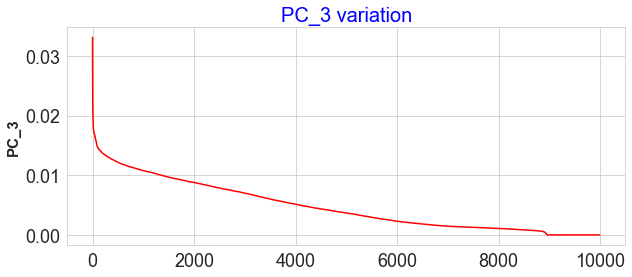

In [386]:
df_4.sort_values(by=['PC_3'], ascending=False, inplace=True)
df_4.reset_index(drop=True, inplace=True)
plt.figure(figsize=(10,4))
plt.plot(df_4['PC_3'], color='red')
plt.ylabel("PC_3", fontsize = 15, fontweight = 'bold')
plt.title("PC_3 variation", fontsize = 20, color = 'blue')
plt.show()

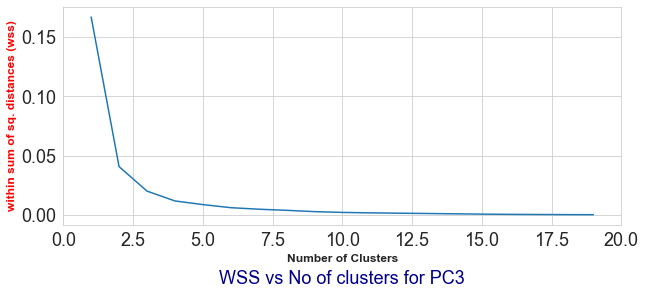

In [387]:
from sklearn.cluster import KMeans
df_clus_data = df_4.loc[df_4['PC_3'].isna()==False]
df_clus_data['PC_3'] = np.round(df_clus_data['PC_3'],3)

wss = []
for i in range(1,20,1):
    kmeans = KMeans(i)
    kmeans.fit(df_clus_data[['PC_3']])
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

number_of_clusters = range(1,20,1)
fig = plt.figure(figsize = (10,4))
plt.plot(number_of_clusters,wss)
#plt.xticks(np.arange(min(number_of_clusters),max(number_of_clusters)+1),1)
plt.title("WSS vs No of clusters for PC3", fontsize = 18, color = 'DarkBlue', y = -0.3)
plt.xlabel("Number of Clusters", fontsize = 12, fontweight = "bold")
plt.ylabel("within sum of sq. distances (wss)",fontsize = 12, fontweight = "bold",color = 'red')
plt.xlim(0,20,1)
plt.show()

In [388]:
df_clus_data.sort_values(by=['PC_3'], ascending=False, inplace=True)
kmeans = KMeans(n_clusters=10, init="random", max_iter=1000, random_state=78)
y_kmc = kmeans.fit_predict(df_clus_data[['PC_3']])

#Now adding the cluster_labels to the original data set
clustered_data_pc3 = df_clus_data[['sampleno','Longitude','Latitude','PC_3']]
cluster_label = pd.DataFrame({'cluster':y_kmc})
clustered_data_pc3= pd.concat([clustered_data_pc3,cluster_label],axis=1)
clustered_data_pc3.cluster.value_counts()

cluster
8    1972
5    1668
6    1461
9    1133
1    1100
3    1074
4     878
0     634
7      74
2       1
Name: count, dtype: int64

In [389]:
cluster_grouped = clustered_data_pc3.groupby(['cluster']).agg({
    'PC_3':['mean','max','min']
}).round(6)
cluster_grouped.columns = ['_'.join(col).strip() for col in cluster_grouped.columns.values]
cluster_grouped = cluster_grouped.reset_index()
cluster_grouped.sort_values(by=['PC_3_min'], ascending=False)

,cluster,PC_3_mean,PC_3_max,PC_3_min
2,2,0.033000,0.033,0.033
7,7,0.017284,0.023,0.016
0,0,0.012856,0.015,0.012
4,4,0.010498,0.011,0.010
9,9,0.008503,0.009,0.008
5,5,0.005960,0.007,0.005
6,6,0.003515,0.004,0.003
3,3,0.002000,0.002,0.002
8,8,0.001000,0.001,0.001
1,1,0.000000,0.000,0.000


In [390]:
clustered_data_pc3.loc[clustered_data_pc3['cluster']==2,'weight'] = 40
clustered_data_pc3.loc[clustered_data_pc3['cluster'] == 7,'weight'] = 32
clustered_data_pc3.loc[clustered_data_pc3['cluster'] == 0,'weight'] = 20
clustered_data_pc3.loc[clustered_data_pc3['cluster'] == 4, 'weight'] = 14
clustered_data_pc3.loc[clustered_data_pc3['cluster'] == 9, 'weight'] = 12
clustered_data_pc3.loc[clustered_data_pc3['cluster'] == 5, 'weight'] = 10
clustered_data_pc3.loc[clustered_data_pc3['cluster'] == 6, 'weight'] = 8
clustered_data_pc3.loc[clustered_data_pc3['cluster'] == 3, 'weight'] = 6
clustered_data_pc3.loc[clustered_data_pc3['cluster'] == 8, 'weight'] = 4
clustered_data_pc3.loc[clustered_data_pc3['cluster'] == 1, 'weight'] = 2
clustered_data_pc3['weight'].value_counts()
clustered_data_pc3.to_csv('pc_3_weight_',index=False)
clustered_data_pc3.head(3)

,sampleno,Longitude,Latitude,PC_3,cluster,weight
0,57E04/057/SS/11,77.009259,15.081338,0.033,2,40.0
2,57E11/110/SS/05,77.712963,15.385135,0.023,7,32.0
3,57E10/194/SS/07-08,77.712963,15.744565,0.023,7,32.0


In [391]:
heat_data = clustered_data_pc3[['Latitude', 'Longitude','weight']].copy()
heat_data.rename(columns={'Latitude':'lat',
                         'Longitude':'lon',
                         'weight':'intesity'}, inplace = True)
heat_data = np.array(heat_data)


coordinates = [(lat, lon, intensity) for lat, lon, intensity in heat_data]
geometry = [Point(lon, lat, intensity) for lat, lon, intensity in coordinates]
gdf = gpd.GeoDataFrame(
    {'intensity': [intensity for _, _, intensity in coordinates]},
    geometry=geometry
)

gdf.set_crs("EPSG:4326", allow_override=True, inplace=True)
gdf.to_file("heatmap_points_PC3.shp")

### Classification Model Tuning on Predictor Maps

In [2]:
import pandas as pd
from openpyxl import load_workbook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, learning_curve, train_test_split, validation_curve
from sklearn.metrics import make_scorer,accuracy_score, f1_score, auc, precision_score, recall_score, confusion_matrix,roc_auc_score
from sklearn.metrics import log_loss

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer

from sklearn.linear_model import LogisticRegression

In [92]:
df = pd.read_excel('training_testing_data_new2.xlsx')

In [93]:
df.isna().sum()


OBJECTID                            0
Lat                                 0
Long                                0
label                               0
remotesens_recls                    0
recls_kernel_min_den                0
recls_Eucl_lin_all_NW               0
recls_kernel_lin_den1               0
recls_kernel_cmptncy_cntrst1        0
litho_ras                           0
recls_RTP_residual_mag_resample2    1
weighted_recls_gravmag_50_50        1
dtype: int64

In [94]:
df['recls_RTP_residual_mag_resample2'].fillna(0,inplace = True)
df=df.loc[((df['recls_RTP_residual_mag_resample2'])!=0) & ((df['recls_RTP_residual_mag_resample2'])!=5)]
df['recls_RTP_residual_mag_resample2'].value_counts()

recls_RTP_residual_mag_resample2
3.0    452
2.0    154
4.0      3
1.0      3
Name: count, dtype: int64

In [95]:
df['weighted_recls_gravmag_50_50'].fillna(0,inplace=True)
df['weighted_recls_gravmag_50_50'].value_counts()

weighted_recls_gravmag_50_50
3.0    456
2.0    118
4.0     38
Name: count, dtype: int64

In [96]:
df['recls_kernel_cmptncy_cntrst1'].value_counts()

recls_kernel_cmptncy_cntrst1
0    520
1     58
2     16
3     15
4      3
Name: count, dtype: int64

### Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, roc_curve,
    confusion_matrix, precision_score, recall_score, f1_score,
    log_loss, make_scorer # Import log_loss and make_scorer
)
from sklearn.datasets import make_classification
from scipy.stats import uniform, loguniform, randint

log_reg = LogisticRegression()
column_transformed = make_column_transformer((OneHotEncoder(),
                                            selected_columns),
                                            remainder="passthrough")
pipe_line = make_pipeline(column_transformed,log_reg)

In [767]:
X = df[['weighted_recls_gravmag_50_50', 'recls_RTP_residual_mag_resample2',
       'recls_Eucl_lin_all_NW','recls_kernel_lin_den1']]

y = df.label
selected_columns = X.columns

X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.80, random_state=35)
outcome = 'label'

In [822]:
print("--- Hyperparameter Tuning with RandomizedSearchCV ---")

class_count = np.bincount(y_train)
weight_for_0 = 1 / class_count[0]
weight_for_1 = 1 / class_count[1]
class_weights = {0: weight_for_0, 1: weight_for_1}
print(f"Calculated class weights: {class_weights}")


column_transformed = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
     ['weighted_recls_gravmag_50_50', 'recls_RTP_residual_mag_resample2',
      'recls_Eucl_lin_all_NW', 'recls_kernel_lin_den1']),
    (StandardScaler(), [col for col in X.columns if col not in ['weighted_recls_gravmag_50_50', 'recls_RTP_residual_mag_resample2',
                                                                 'recls_Eucl_lin_all_NW', 'recls_kernel_lin_den1']]),
    remainder="passthrough"
)

log_reg = LogisticRegression(random_state=42)
pipe_line = make_pipeline(column_transformed, log_reg)


scorers = {
    "AUC": make_scorer(roc_auc_score, needs_proba=True),
    "precision_score": make_scorer(precision_score,zero_division=0),
    "recall_score": make_scorer(recall_score, zero_division=0),
    "accuracy_score": make_scorer(accuracy_score),
    "f1_score": make_scorer(f1_score),
    "log_loss": make_scorer(log_loss, greater_is_better=False, needs_proba=True)
}


param_grid = [
    {
        'logisticregression__penalty': ['l1', 'l2'],
        'logisticregression__C': loguniform(0.001, 1),
        'logisticregression__solver': ['liblinear'],
        'logisticregression__max_iter': randint(100, 1000),
        'logisticregression__class_weight': [class_weights]
    },
    {
        'logisticregression__penalty': ['l2'],
        'logisticregression__C': loguniform(0.001, 1),
        'logisticregression__solver': ['newton-cg', 'lbfgs', 'sag'],
        'logisticregression__max_iter': randint(100, 1000),
        'logisticregression__class_weight': [class_weights]
    },
    {
        'logisticregression__penalty': ['l1', 'l2'],
        'logisticregression__C': loguniform(0.001, 1),
        'logisticregression__solver': ['saga'],
        'logisticregression__max_iter': randint(100, 1000),
        'logisticregression__class_weight': [class_weights]
    }
]



random_search = RandomizedSearchCV(
    estimator=pipe_line,
    param_distributions=param_grid,
    n_iter=500,
    scoring=scorers,
    refit="AUC", 
    cv=5,
    n_jobs=-1,
    verbose=True,
    random_state=42
)

print("\nStarting RandomizedSearchCV fit...")
try:
    random_search.fit(X_train, y_train)
    print("RandomizedSearchCV fit finished successfully.")
except Exception as e:
    print(f"RandomizedSearchCV fit failed with error: {e}")



--- Hyperparameter Tuning with RandomizedSearchCV ---
Calculated class weights: {0: 0.002277904328018223, 1: 0.02}

Starting RandomizedSearchCV fit...
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
RandomizedSearchCV fit finished successfully.


In [852]:
results = pd.DataFrame(random_search.cv_results_)
results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__class_weight,param_logisticregression__max_iter,param_logisticregression__penalty,param_logisticregression__solver,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_precision_score,split1_test_precision_score,split2_test_precision_score,split3_test_precision_score,split4_test_precision_score,mean_test_precision_score,std_test_precision_score,rank_test_precision_score,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_test_accuracy_score,split1_test_accuracy_score,split2_test_accuracy_score,split3_test_accuracy_score,split4_test_accuracy_score,mean_test_accuracy_score,std_test_accuracy_score,rank_test_accuracy_score,split0_test_f1_score,split1_test_f1_score,split2_test_f1_score,split3_test_f1_score,split4_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score,split0_test_log_loss,split1_test_log_loss,split2_test_log_loss,split3_test_log_loss,split4_test_log_loss,mean_test_log_loss,std_test_log_loss,rank_test_log_loss
0,0.003949,0.001764,0.006227,0.002953,0.245261,"{0: 0.002277904328018223, 1: 0.02}",370,l1,saga,"{'logisticregression__C': 0.2452612631133676, ...",0.5,0.5,0.5,0.5,0.5,0.5,0.0,344,0.0,0.102041,0.0,0.0,0.0,0.020408,0.040816,344,0.0,1.0,0.0,0.0,0.0,0.2,0.4,340,0.897959,0.102041,0.897959,0.897959,0.896907,0.738565,0.318262,424,0.0,0.185185,0.0,0.0,0.0,0.037037,0.074074,344,-0.692238,-0.696933,-0.690256,-0.688302,-0.692519,-0.692050,0.002876,279
1,0.002737,0.000114,0.004260,0.000148,0.061738,"{0: 0.002277904328018223, 1: 0.02}",221,l1,liblinear,"{'logisticregression__C': 0.06173770394704572,...",0.5,0.5,0.5,0.5,0.5,0.5,0.0,344,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,413,0.897959,0.897959,0.897959,0.897959,0.896907,0.897749,0.000421,1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,413,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,0.000000,413
2,0.002833,0.000227,0.004061,0.000122,0.001494,"{0: 0.002277904328018223, 1: 0.02}",187,l1,saga,{'logisticregression__C': 0.001493656855461763...,0.5,0.5,0.5,0.5,0.5,0.5,0.0,344,0.0,0.102041,0.0,0.0,0.0,0.020408,0.040816,344,0.0,1.0,0.0,0.0,0.0,0.2,0.4,340,0.897959,0.102041,0.897959,0.897959,0.896907,0.738565,0.318262,424,0.0,0.185185,0.0,0.0,0.0,0.037037,0.074074,344,-0.692239,-0.696933,-0.690256,-0.688302,-0.692520,-0.692050,0.002876,281


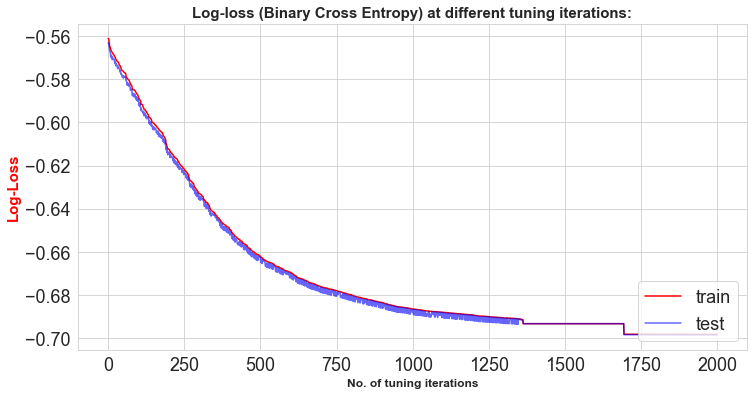

In [829]:
results = results.sort_values(by=['mean_train_log_loss'], ascending=False).reset_index()
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.figure(figsize = (12,6))
plt.plot(results['mean_train_log_loss'],color = 'red')
plt.plot(results['mean_test_log_loss'],color = 'blue',alpha= 0.6)
plt.title('Log-loss (Binary Cross Entropy) at different tuning iterations:', 
          weight = 'bold', fontsize = 15)
plt.xlabel('No. of tuning iterations', weight = 'bold', size = 12)
plt.ylabel('Log-Loss', size = 15, color= 'red', weight = 'bold')
plt.legend(['train','test'],loc = 'lower right')
plt.show()

## Final Model

In [97]:
X = df[['weighted_recls_gravmag_50_50', 'recls_RTP_residual_mag_resample2',
       'recls_Eucl_lin_all_NW','recls_kernel_lin_den1']]

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

log_reg = LogisticRegression()
column_transformed = make_column_transformer((OneHotEncoder(),
                                            selected_columns),
                                            remainder="passthrough")
pipe_line = make_pipeline(column_transformed,log_reg)


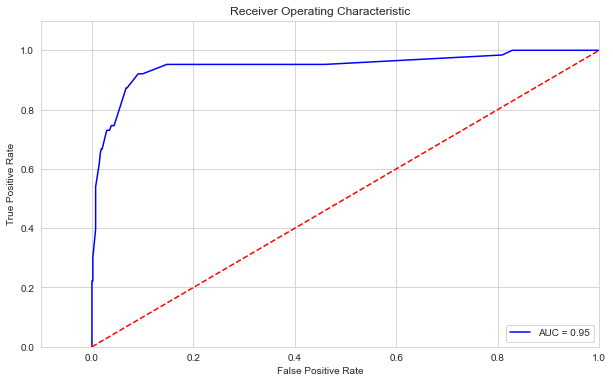

In [99]:
pipe_line.set_params(logisticregression__C=0.1, logisticregression__penalty='l2').fit(X,y)
pipe_line.fit(X, y)

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

probs = pipe_line.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [101]:
print(f"\nC: {pipe_line.named_steps['logisticregression'].C}")
print(f"Penalty: {pipe_line.named_steps['logisticregression'].penalty}")


C: 0.1
Penalty: l2


### K-S Statistics

In [82]:
def ks_stats(clf, X, y):
    import pandas as pd
    import numpy as np
    from sklearn.metrics import roc_auc_score, roc_curve # Import roc_curve for context
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import make_column_transformer
    from sklearn.pipeline import make_pipeline
    
    pipe_line = clf
    X = X
    y = y
    
    
    y_proba = pipe_line.predict_proba(X)[:, 1]

    results_df = pd.DataFrame({
        'true_label': y,
        'predicted_proba': y_proba
    })

    results_df = results_df.sort_values(by='predicted_proba', ascending=False).reset_index(drop=True)
    results_df['decile'] = pd.qcut(results_df['predicted_proba'], q=10, labels=False, duplicates='drop')
    if results_df['decile'].nunique() < 10:
        print(f"Warning: Less than 10 unique deciles due to duplicate probability scores. Found {results_df['decile'].nunique()} deciles.")

    ks_df = results_df.groupby('decile').agg(
        total_obs=('true_label', 'size'),
        positive_count=('true_label', lambda x: (x == 1).sum()),
        negative_count=('true_label', lambda x: (x == 0).sum()),
        min_proba = ('predicted_proba', lambda x: x.min()),
        max_proba = ('predicted_proba', lambda x: x.max()),
        mean_proba = ('predicted_proba', lambda x: x.mean())
    ).reset_index()

    ks_df['positive_rate'] = ks_df['positive_count'] / ks_df['positive_count'].sum()
    ks_df['negative_rate'] = ks_df['negative_count'] / ks_df['negative_count'].sum()

    ks_df['cumulative_positive_rate'] = ks_df['positive_rate'].cumsum()
    ks_df['cumulative_negative_rate'] = ks_df['negative_rate'].cumsum()

    ks_df['KS_Difference'] = np.abs(ks_df['cumulative_positive_rate'] - ks_df['cumulative_negative_rate'])
    ks_df['KS_Difference'] = np.round(ks_df['KS_Difference'],2)
    
    ks_df['max_proba'] = np.round(ks_df['max_proba'],2)
    ks_df['min_proba'] = np.round(ks_df['min_proba'],2)
    ks_df['mean_proba'] = np.round(ks_df['mean_proba'],2)

    max_ks_value = ks_df['KS_Difference'].max()

    print("\n--- K-S Decile-Wise Analysis ---")
    print(ks_df[['decile', 'total_obs', 'positive_count', 'negative_count',
                  'cumulative_positive_rate', 'cumulative_negative_rate', 'KS_Difference']])
    print(f"\nMaximum K-S Statistic (decile-wise): {max_ks_value:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(ks_df['decile'], ks_df['cumulative_positive_rate'], label='Cumulative Positive Rate', marker='o')
    plt.plot(ks_df['decile'], ks_df['cumulative_negative_rate'], label='Cumulative Negative Rate', marker='o')
    plt.plot(ks_df['decile'], ks_df['KS_Difference'], label='KS Difference', linestyle='--', color='red', marker='x')
    plt.title('K-S Decile-Wise Curve')
    plt.xlabel('Decile (Highest Probability -> Lowest Probability)')
    plt.ylabel('Cumulative Rate')
    plt.xticks(ks_df['decile'])
    plt.grid(True)
    plt.legend()
    plt.show()
    return ks_df


--- K-S Decile-Wise Analysis ---
   decile  total_obs  positive_count  negative_count  \
0       0        238               2             236   
1       1         28               0              28   
2       2         51               0              51   
3       3         61               1              60   
4       4         52               0              52   
5       5         83               5              78   
6       6         38              16              22   
7       7         61              39              22   

   cumulative_positive_rate  cumulative_negative_rate  KS_Difference  
0                  0.031746                  0.429872           0.40  
1                  0.031746                  0.480874           0.45  
2                  0.031746                  0.573770           0.54  
3                  0.047619                  0.683060           0.64  
4                  0.047619                  0.777778           0.73  
5                  0.126984        

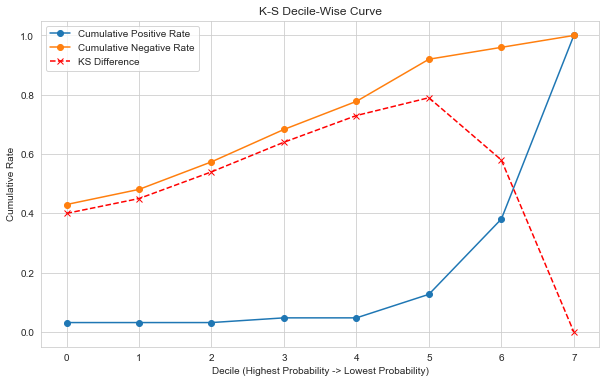

,decile,total_obs,positive_count,negative_count,min_proba,max_proba,mean_proba,positive_rate,negative_rate,cumulative_positive_rate,cumulative_negative_rate,KS_Difference
0,0,238,2,236,0.02,0.02,0.02,0.031746,0.429872,0.031746,0.429872,0.40
1,1,28,0,28,0.03,0.03,0.03,0.000000,0.051002,0.031746,0.480874,0.45
2,2,51,0,51,0.03,0.03,0.03,0.000000,0.092896,0.031746,0.573770,0.54
3,3,61,1,60,0.04,0.04,0.04,0.015873,0.109290,0.047619,0.683060,0.64
4,4,52,0,52,0.04,0.05,0.04,0.000000,0.094718,0.047619,0.777778,0.73
5,5,83,5,78,0.05,0.23,0.15,0.079365,0.142077,0.126984,0.919854,0.79
6,6,38,16,22,0.27,0.33,0.30,0.253968,0.040073,0.380952,0.959927,0.58
7,7,61,39,22,0.34,0.59,0.44,0.619048,0.040073,1.000000,1.000000,0.00


In [83]:
ks_stats(pipe_line,X,y)

### Classification Report

In [105]:
prediction = pipe_line.predict(X)
print(confusion_matrix(y,prediction))
print(accuracy_score(y,prediction))
print(classification_report(y,prediction))

[[549   0]
 [ 50  13]]
0.9183006535947712
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       549
           1       1.00      0.21      0.34        63

    accuracy                           0.92       612
   macro avg       0.96      0.60      0.65       612
weighted avg       0.93      0.92      0.89       612

